In [1]:
import pandas as pd
from econml.dml import DML
from econml.sklearn_extensions.linear_model import StatsModelsLinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-

In [2]:
import numpy as np
import scipy

np.random.seed(123)
X = np.random.normal(size=(1000, 5))
T = np.random.binomial(1, scipy.special.expit(X[:, 0]))
y = (1 + .5*X[:, 0]) * T + X[:, 0] + np.random.normal(size=(1000,))
est = DML(
    model_y=RandomForestRegressor(),
    model_t=RandomForestClassifier(),
    model_final=StatsModelsLinearRegression(fit_intercept=False),
    linear_first_stages=False,
    discrete_treatment=True
)
est.fit(y, T, X=X, W=None)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


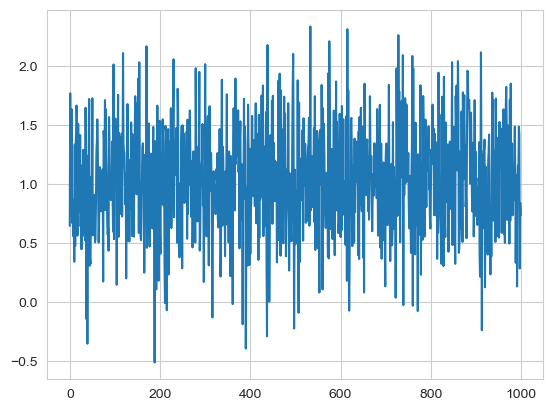

In [3]:
import matplotlib.pyplot as plt
plt.plot(est.effect(X))

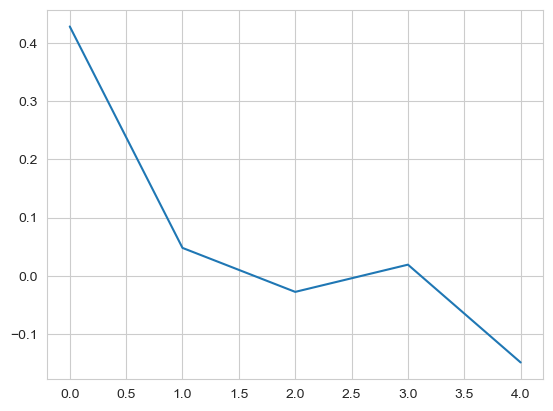

In [4]:
plt.plot(est.coef_)

In [5]:
est.coef__interval()

(array([ 0.2516098 , -0.10246179, -0.16162612, -0.12225645, -0.28736476]),
 array([ 0.60429405,  0.19827042,  0.10647498,  0.16056311, -0.01012081]))

In [6]:
est.intercept_

1.0158561842707876

In [7]:
est.intercept__interval()

(0.8756545134244187, 1.1560578551171565)

#### GDP

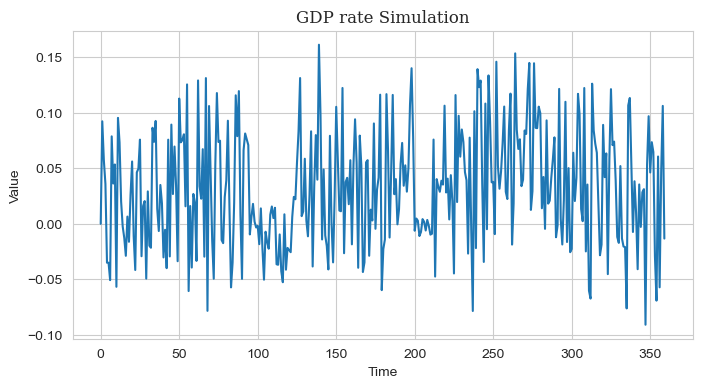

In [29]:
import numpy as np
import matplotlib.pyplot as plt

seasonal_order = (1, 0, 0, 12)

np.random.seed(42)
n_samples = 360  
t = np.arange(n_samples)
epsilon = np.random.uniform(-0.06, 0.1, n_samples)

y = np.zeros(n_samples)
for i in range(n_samples):
    y[i] = epsilon[i]
    if i >= 12:
        y[i] += 0.5 * y[i-12]  # Seasonal term

y[100:124] *= -0.4
y[200:212] *= -0.1

plt.figure(figsize = (8, 4))
plt.plot(t, y)
plt.title('GDP rate Simulation', fontfamily= 'Serif', fontsize = 12)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

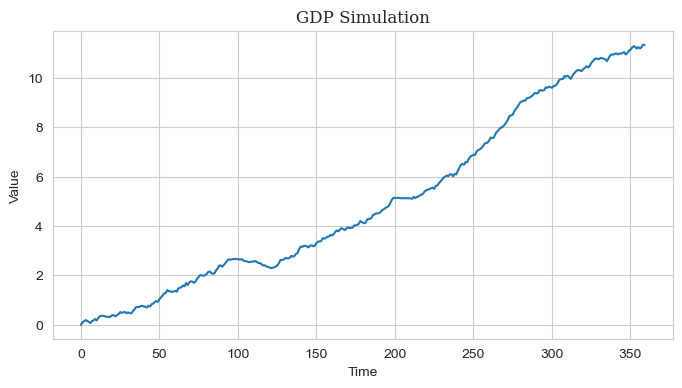

In [30]:
plt.figure(figsize = (8, 4))
plt.plot(t, y.cumsum())
plt.title('GDP Simulation', fontfamily= 'Serif', fontsize = 12)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

#### Consumption

$$c_t = \gamma y_{t-1} + \epsilon_t$$

In [31]:
import pandas as pd
matrix = pd.DataFrame(y, columns = ['gdp'])

In [32]:
matrix['consumption'] = matrix['gdp'].shift(1) * 0.6 + np.random.uniform(-0.02, 0.02, 1)

In [33]:
matrix

,gdp,consumption
0,-0.000074,NaN
1,0.092114,-0.004517
2,0.057119,0.050795
3,0.035785,0.029798
4,-0.035037,0.016998
...,...,...
355,0.060458,-0.045966
356,-0.057188,0.031802
357,0.047872,-0.038786
358,0.105991,0.024250


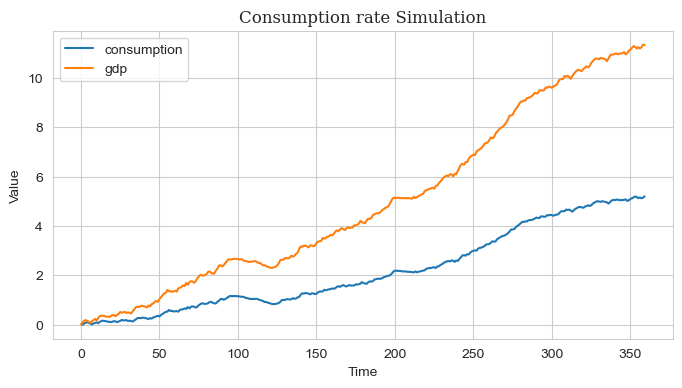

In [34]:
plt.figure(figsize = (8, 4))
plt.plot(t, matrix['consumption'].cumsum(), label = 'consumption')
plt.plot(t, matrix['gdp'].cumsum(), label = 'gdp')
plt.title('Consumption rate Simulation', fontfamily= 'Serif', fontsize = 12)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

#### Investment

$$I_t = \alpha c_{t-1} + u_t$$

In [35]:
matrix['investment'] = matrix['consumption'].shift(1) * 0.4 + np.random.uniform(-0.003, 0.006, 1)

In [36]:
matrix

,gdp,consumption,investment
0,-0.000074,NaN,NaN
1,0.092114,-0.004517,NaN
2,0.057119,0.050795,0.000983
3,0.035785,0.029798,0.023108
4,-0.035037,0.016998,0.014709
...,...,...,...
355,0.060458,-0.045966,-0.005966
356,-0.057188,0.031802,-0.015597
357,0.047872,-0.038786,0.015510
358,0.105991,0.024250,-0.012725


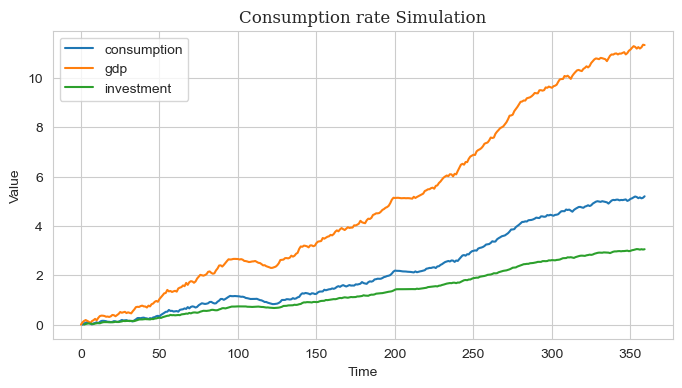

In [37]:
plt.figure(figsize = (8, 4))
plt.plot(t, matrix['consumption'].cumsum(), label = 'consumption')
plt.plot(t, matrix['gdp'].cumsum(), label = 'gdp')
plt.plot(t, matrix['investment'].cumsum(), label = 'investment')
plt.title('Consumption rate Simulation', fontfamily= 'Serif', fontsize = 12)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

#### Government Expenditure

In [38]:
matrix['government'] = np.random.uniform(-0.006, 0.01, n_samples)

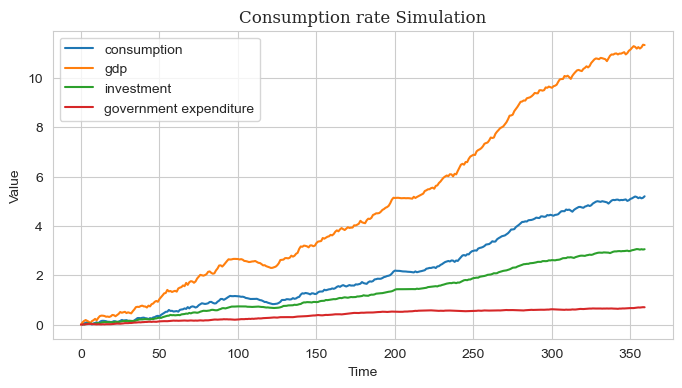

In [39]:
plt.figure(figsize = (8, 4))
plt.plot(t, matrix['consumption'].cumsum(), label = 'consumption')
plt.plot(t, matrix['gdp'].cumsum(), label = 'gdp')
plt.plot(t, matrix['investment'].cumsum(), label = 'investment')
plt.plot(t, matrix['government'].cumsum(), label = 'government expenditure')
plt.title('Consumption rate Simulation', fontfamily= 'Serif', fontsize = 12)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

#### Net Export

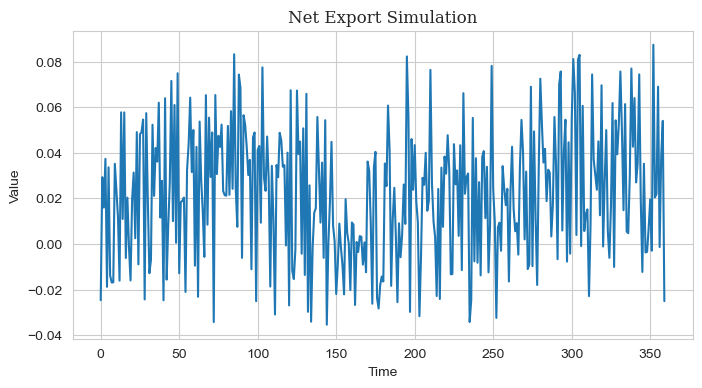

In [40]:
seasonal_order = (1, 0, 0, 12)

n_samples = 360  
t = np.arange(n_samples)
epsilon = np.random.uniform(-0.03, 0.05, n_samples)

nx = np.zeros(n_samples)
for i in range(n_samples):
    nx[i] = epsilon[i]
    if i >= 12:
        nx[i] += 0.6 * nx[i-12]  # Seasonal term

nx[150:170] *= -0.4

plt.figure(figsize = (8, 4))
plt.plot(t, nx)
plt.title('Net Export Simulation', fontfamily= 'Serif', fontsize = 12)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [41]:
matrix['export'] = nx

In [42]:
matrix.dropna(inplace = True)

#### Feature Matrix

In [43]:
matrix

,gdp,consumption,investment,government,export
2,0.057119,0.050795,0.000983,0.009063,0.015958
3,0.035785,0.029798,0.023108,0.000178,0.037346
4,-0.035037,0.016998,0.014709,0.009379,-0.018818
5,-0.035041,-0.025495,0.009589,0.008486,0.033621
6,-0.050707,-0.025498,-0.007409,-0.002867,-0.013870
...,...,...,...,...,...
355,0.060458,-0.045966,-0.005966,0.009440,0.069018
356,-0.057188,0.031802,-0.015597,-0.004011,-0.001376
357,0.047872,-0.038786,0.015510,0.005694,0.038628
358,0.105991,0.024250,-0.012725,0.009013,0.054020


In [44]:
X = matrix.iloc[:,1:]
T = np.random.binomial(1, scipy.special.expit(matrix.iloc[:,0]))
y = matrix.iloc[:,0]
est = DML(
    model_y=RandomForestRegressor(),
    model_t=RandomForestClassifier(),
    model_final=StatsModelsLinearRegression(fit_intercept=False),
    linear_first_stages=False,
    discrete_treatment=True
)
est.fit(y, T, X=X, W=None)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


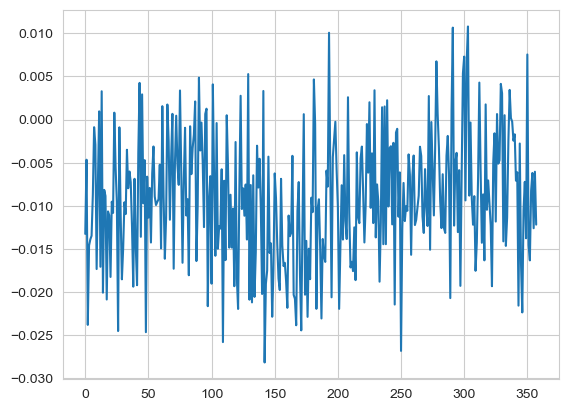

In [45]:
import matplotlib.pyplot as plt
plt.plot(est.effect(X))

In [46]:
est.coef_

array([ 0.06284214, -0.07483531, -0.80885871,  0.20518242])

Random Forest Regression

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = matrix.iloc[:,1:]
y = matrix['gdp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

model = RandomForestRegressor(n_estimators = 1000, 
                              random_state = 42,
                              criterion = 'absolute_error',
                              max_depth = 6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0030921273002989763


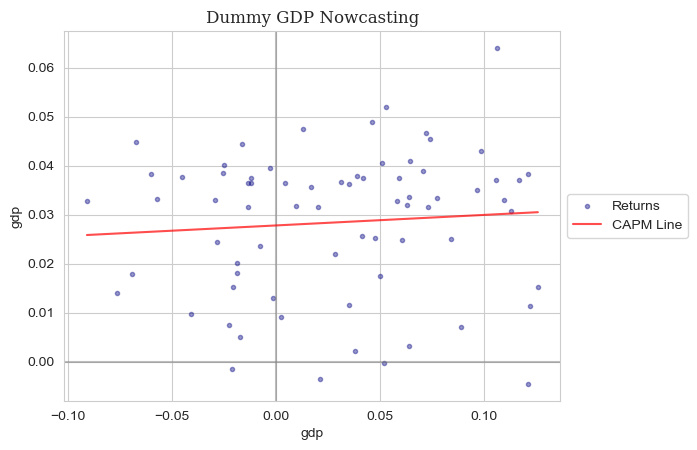

In [53]:
import seaborn as sns
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.axvline(0, color = 'grey', alpha = 0.5)
plt.axhline(0, color = 'grey', alpha = 0.5)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'CAPM Line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Dummy GDP Nowcasting', fontfamily = 'Serif')
plt.show()

In [49]:
model.feature_importances_

array([0.60311161, 0.14120861, 0.10246692, 0.15321286])